<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/NB_Paro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tasa de desempleo.** Indicador nº 1 de la ISO-37120:

De acuerdo con el objetivo principal del presente TFM, se han recopilado datos de la tasa de desempleo de Barcelona a nivel de barrio facilitadas por el Departament de Treball, Afers Socials i Families per codi postal a traves del portal [Open Data BCN](https://opendata-ajuntament.barcelona.cat/es). Los datos del paro vienen informados en función del sexo.

## 1. Carga del conjunto de datos


Cargamos en un dataframe los csv obtenidos desde el año 2011 hasta 2023 sobre el paro en la ciudad de Barcelona

In [1]:
# Importamos las librerias necesarias
#import requests
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [2]:
def cargar_csv(ruta):
    try:
        # Cargar el archivo CSV en un DataFrame de pandas
        dataframe = pd.read_csv(ruta)
        return dataframe
    except Exception as e:
        print("Error al cargar el archivo CSV:", e)
        return None

In [3]:
# Directorio del indicador 1
directorio ='/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Básico/Economía/Indicador_1_Paro'

# Lista de archivos CSV en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]

# Lista para almacenar los DataFrames de cada archivo CSV
dfs = []

# Iterar sobre cada archivo CSV y cargarlo en un DataFrame
for archivo in archivos_csv:
    ruta_archivo = os.path.join(directorio, archivo)
    df = cargar_csv(ruta_archivo)
    dfs.append(df)

# Concatenar todos los DataFrames en un solo DataFrame
df_final = pd.concat(dfs, ignore_index=True)

In [4]:
# Mostramos las primeras filas del dataframe
df_final.head()

,Any,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,Demanda_ocupacio,Nombre
0,2023,1,1,Ciutat Vella,1,el Raval,Dones,Atur Registrat,1379
1,2023,1,1,Ciutat Vella,2,el Barri Gòtic,Dones,Atur Registrat,389
2,2023,1,1,Ciutat Vella,3,la Barceloneta,Dones,Atur Registrat,427
3,2023,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Dones,Atur Registrat,591
4,2023,1,2,Eixample,5,el Fort Pienc,Dones,Atur Registrat,538


In [5]:
# Observamos el numero y los nombres de los atributos, el numero de filas y si hay missing-values o no
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39072 entries, 0 to 39071
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Any               39072 non-null  int64 
 1   Mes               39072 non-null  int64 
 2   Codi_Districte    39072 non-null  int64 
 3   Nom_Districte     39072 non-null  object
 4   Codi_Barri        39072 non-null  int64 
 5   Nom_Barri         39072 non-null  object
 6   Sexe              39072 non-null  object
 7   Demanda_ocupacio  39072 non-null  object
 8   Nombre            39072 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.7+ MB


El dataset se compone de un total de 9 columnas:
*   **Any:** Año en el que se recogieron los datos
*   **Mes:** Mes en el que se recogieron los datos
*   **Codi_Districte:** Codigo del distrito de Barcelona
*   **Nom_Districte:** Nombre del distrito de Barcelona
*   **Codi_Barri:** Codigo del barrio de Barcelona
*   **Nom_Barri:** Nombre del barrio de Barcelona
*   **Sexe:** Sexo de las personas
*   **Demanda_ocupacio:** Demanda de la ocupacion de trabajadores
*   **Numbre:** Cantidad de personas

El dataset tiene un total de 3552 filas y missing-values


In [6]:
# Analizamos las variables numericas
df_final.describe()

,Any,Mes,Codi_Districte,Codi_Barri,Nombre
count,39072.000000,39072.000000,39072.000000,39072.000000,39072.000000
mean,2017.818182,6.500000,7.500000,37.837838,449.660831
std,3.459371,3.452097,11.061701,22.119143,443.470444
min,2011.000000,1.000000,1.000000,1.000000,0.000000
25%,2015.000000,3.750000,4.000000,19.000000,125.000000
50%,2018.000000,6.500000,7.000000,37.500000,300.000000
75%,2021.000000,9.250000,8.000000,56.000000,660.000000
max,2023.000000,12.000000,99.000000,99.000000,5295.000000


Analizando cada una de las variables numericas vemos que la variable:
*   **Any:** es integra y contiene la información correcta.
*   **Mes:** es integra y contiene la información correcta.
*   **Codi_Districte:** aunque es una variable numerica corresponde con valores categoricos. Por otro lado vemos que puede haber algun valor que no es correcto. Barcelona se compone de 10 distritos, y en cambio como valor maximo nos aparece 99.
*   **Codi_Barri:** aunque es una variable numerica corresponde con valores categoricos. Por otro lado vemos que puede haber algun valor que no es correcto. Barcelona se compone de 73 barrios, y en cambio como valor maximo nos aparece 99
*   **Nombre:** es integra y contiene la información correcta.


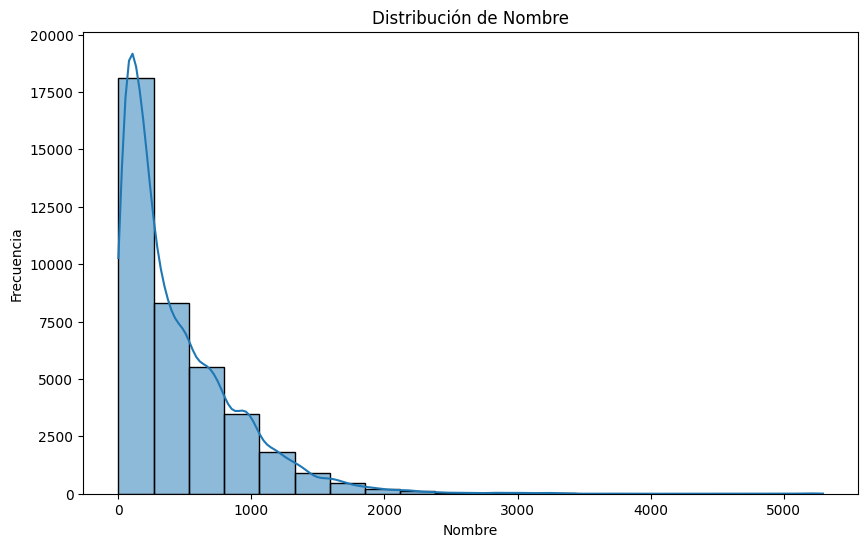

In [7]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_final['Nombre'], bins=20, kde=True)
plt.title('Distribución de Nombre')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')
plt.show()

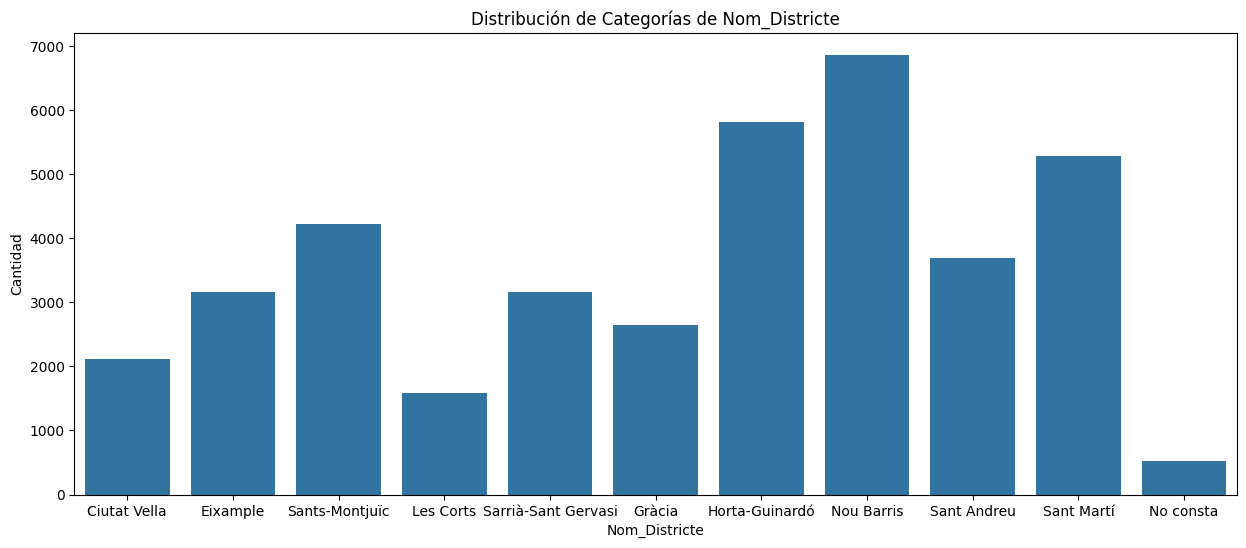

In [8]:
# Visualizamos la distribución de la variable categórica Nom_Districte utilizando un gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(x='Nom_Districte', data=df_final)
plt.title('Distribución de Categorías de Nom_Districte')
plt.xlabel('Nom_Districte')
plt.ylabel('Cantidad')
plt.show()

Barcelona consta de 10 distritos. En este gráfico observamos que el valor "No consta" no se corresponde con ningun nombre de distrito.

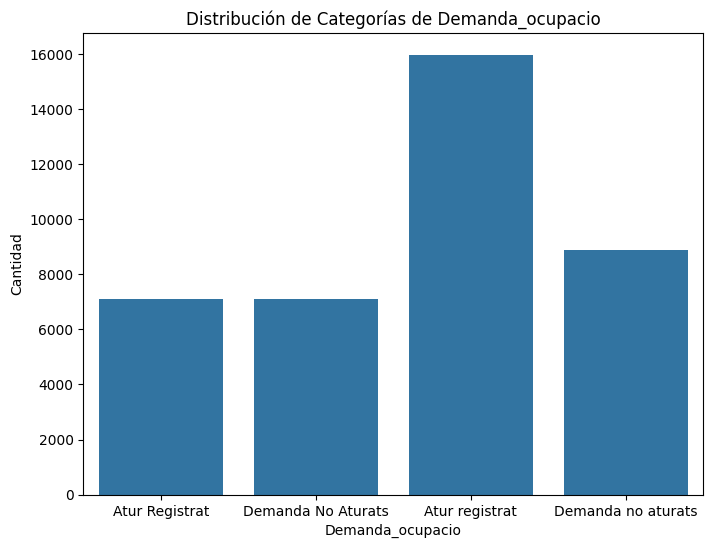

In [9]:
# Visualizamos la distribución de una variable Demanda_ocupacio categórica utilizando un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='Demanda_ocupacio', data=df_final)
plt.title('Distribución de Categorías de Demanda_ocupacio')
plt.xlabel('Demanda_ocupacio')
plt.ylabel('Cantidad')
plt.show()

El dataset tiene una variable categorica que engloba dos medidas:
*   Paro Registrado (Atur Registrat)
*   Demanda no parados (Demanda No Aturats)

Ademas esta variable tiene las mismas categorias dobladas por escribirse de manera diferente.

## 2. Limpieza de datos

Verificamos que si hay datos faltantes

In [10]:
df_final.isnull().sum()

Any                 0
Mes                 0
Codi_Districte      0
Nom_Districte       0
Codi_Barri          0
Nom_Barri           0
Sexe                0
Demanda_ocupacio    0
Nombre              0
dtype: int64

Observamos que no hay datos faltantes propiamente dichos, pero aun asi debemos centrarnos en las siguientes problematicas que estan directamente ligadas con la limpieza de datos:

1.   Eliminar de la variable de Nom_Districte, la categoria "No consta"
2.   Aislar en dos variables distintas la variable continua "Nombre", para parados registrados y para demanda de no parados
3.   Agrupar los datos de la variable "Nombre" para omitir la información desglosada por sexo.


### Eliminar de la varibale Nom_Districte, la categoria "No consta"

In [11]:
# Ahondamos en los distritos mirando el codigo y el nombre del distrito, obteniendo un dataset unicamente con estas dos columnas
distritos = df_final[['Codi_Districte','Nom_Districte']]

# Agrupamos por codigo y nombre de distrito
distritosAgrup=distritos.groupby(['Codi_Districte','Nom_Districte'])

# Realizamos un conteo de cada codigo de distrito
distritosAgrup=distritosAgrup['Codi_Districte'].count()

print(distritosAgrup)

Codi_Districte  Nom_Districte      
1               Ciutat Vella           2112
2               Eixample               3168
3               Sants-Montjuïc         4224
4               Les Corts              1584
5               Sarrià-Sant Gervasi    3168
6               Gràcia                 2640
7               Horta-Guinardó         5808
8               Nou Barris             6864
9               Sant Andreu            3696
10              Sant Martí             5280
99              No consta               528
Name: Codi_Districte, dtype: int64


In [12]:
# Filtramos el dataset datos, para quedarnos con todas aquellas filas que tienen un Codi_Districte diferente a 99
datosFiltrados = df_final[df_final['Codi_Districte']!=99]

In [13]:
datosFiltrados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38544 entries, 0 to 39070
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Any               38544 non-null  int64 
 1   Mes               38544 non-null  int64 
 2   Codi_Districte    38544 non-null  int64 
 3   Nom_Districte     38544 non-null  object
 4   Codi_Barri        38544 non-null  int64 
 5   Nom_Barri         38544 non-null  object
 6   Sexe              38544 non-null  object
 7   Demanda_ocupacio  38544 non-null  object
 8   Nombre            38544 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.9+ MB


Despues de estos primeros pasos, hemos pasado de un dataframe de 39072 filas a 38544

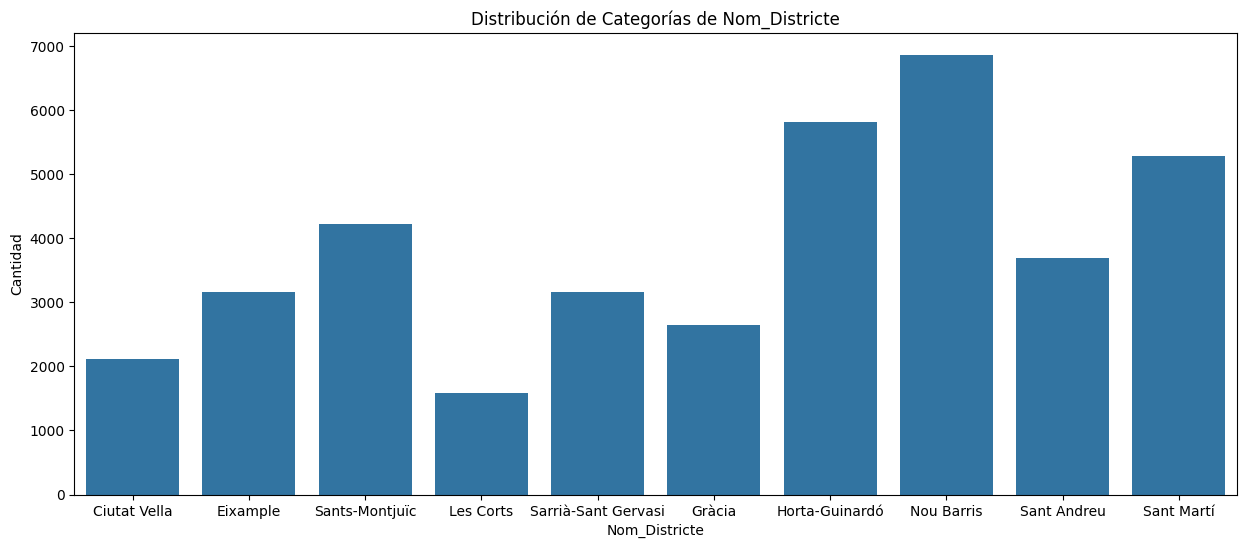

In [14]:
# Visualizamos la distribución de la variable categórica Nom_Districte utilizando un gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(x='Nom_Districte', data=datosFiltrados)
plt.title('Distribución de Categorías de Nom_Districte')
plt.xlabel('Nom_Districte')
plt.ylabel('Cantidad')
plt.show()

### Aislar en dos variables distintas la variable continua "Nombre"

In [15]:
# Filtrar el dataFrame por Total. Milers d'euros
df_parados = datosFiltrados[(datosFiltrados['Demanda_ocupacio'] == "Atur Registrat") | (datosFiltrados['Demanda_ocupacio'] == "Atur registrat")]

# Modificamos nombre de la variable valor
df_parados = df_parados.rename(columns={'Nombre': 'ParadosReg'})

# Modificamos nombre de la variable valor
df_parados = df_parados.drop(columns=['Demanda_ocupacio'])

df_parados.head()

,Any,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,ParadosReg
0,2023,1,1,Ciutat Vella,1,el Raval,Dones,1379
1,2023,1,1,Ciutat Vella,2,el Barri Gòtic,Dones,389
2,2023,1,1,Ciutat Vella,3,la Barceloneta,Dones,427
3,2023,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Dones,591
4,2023,1,2,Eixample,5,el Fort Pienc,Dones,538


In [16]:
# Filtrar el dataFrame por Total. Milers d'euros
df_no_parados = datosFiltrados[(datosFiltrados['Demanda_ocupacio'] == "Demanda No Aturats") | (datosFiltrados['Demanda_ocupacio'] == "Demanda no aturats")]

# Modificamos nombre de la variable valor
df_no_parados = df_no_parados.rename(columns={'Nombre': 'NoParados'})

# Modificamos nombre de la variable valor
df_no_parados = df_no_parados.drop(columns=['Demanda_ocupacio'])

df_no_parados.head()

,Any,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,NoParados
74,2023,1,1,Ciutat Vella,1,el Raval,Dones,446
75,2023,1,1,Ciutat Vella,2,el Barri Gòtic,Dones,128
76,2023,1,1,Ciutat Vella,3,la Barceloneta,Dones,137
77,2023,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Dones,193
78,2023,1,2,Eixample,5,el Fort Pienc,Dones,184


In [17]:
# Realizar la unión de los DataFrames por múltiples claves
df_filtrado = pd.merge(df_parados, df_no_parados, how='left')

# Mostrar el resultado del filtrado
df_filtrado.head()

,Any,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,ParadosReg,NoParados
0,2023,1,1,Ciutat Vella,1,el Raval,Dones,1379,446.0
1,2023,1,1,Ciutat Vella,2,el Barri Gòtic,Dones,389,128.0
2,2023,1,1,Ciutat Vella,3,la Barceloneta,Dones,427,137.0
3,2023,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Dones,591,193.0
4,2023,1,2,Eixample,5,el Fort Pienc,Dones,538,184.0


In [18]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22776 entries, 0 to 22775
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             22776 non-null  int64  
 1   Mes             22776 non-null  int64  
 2   Codi_Districte  22776 non-null  int64  
 3   Nom_Districte   22776 non-null  object 
 4   Codi_Barri      22776 non-null  int64  
 5   Nom_Barri       22776 non-null  object 
 6   Sexe            22776 non-null  object 
 7   ParadosReg      22776 non-null  int64  
 8   NoParados       15768 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 1.6+ MB


### Agrupar la variable "Nombre", para omitir la variable "Sexe"

El indicador 1 de la ISO-37120, "tasa de desempleo" no distingue entre sexos, por lo que se debera agrupar la información omitiendo la variable sexe


In [19]:
# Obtenemos un dataframe sin la variable Sexe
df_noSexe=df_filtrado[['Any','Mes','Codi_Districte','Nom_Districte','Codi_Barri','Nom_Barri','ParadosReg','NoParados']]
df_noSexe.head()

,Any,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,ParadosReg,NoParados
0,2023,1,1,Ciutat Vella,1,el Raval,1379,446.0
1,2023,1,1,Ciutat Vella,2,el Barri Gòtic,389,128.0
2,2023,1,1,Ciutat Vella,3,la Barceloneta,427,137.0
3,2023,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",591,193.0
4,2023,1,2,Eixample,5,el Fort Pienc,538,184.0


In [20]:
# Agrupamos los datos por Any, Mes, Codi_Districte, Nom_Districte, Codi_Barri y Nom_Barri
df_ParoAgrup = df_noSexe.groupby(['Any','Mes','Codi_Districte','Nom_Districte','Codi_Barri','Nom_Barri'])

# Sumamos las variables continuas ParadosReg y NoParados
df_ParoAgrup=df_ParoAgrup[['ParadosReg','NoParados']].sum()

print("Primeras filas del DataFrame:")
df_ParoAgrup.head(12)

Primeras filas del DataFrame:


ParadosReg  \
Any  Mes Codi_Districte Nom_Districte  Codi_Barri Nom_Barri                                           
2011 1   1              Ciutat Vella   1          el Raval                                     5034   
                                       2          el Barri Gòtic                               1468   
                                       3          la Barceloneta                               1463   
                                       4          Sant Pere, Santa Caterina i la Ribera        2023   
         2              Eixample       5          el Fort Pienc                                1901   
                                       6          la Sagrada Família                           3084   
                                       7          la Dreta de l'Eixample                       2071   
                                       8          l'Antiga Esquerra de l'Eixample              2400   
                                       9          la Nova Esquerra de l'Eixample               3211   
                                       10         Sant Antoni                                  2351   
         3              Sants-Montjuïc 11         el Poble Sec                                 3389   
                                       12         la Marina del Prat Vermell                    119   

                                                                                         NoParados  
Any  Mes Codi_Districte Nom_Districte  Codi_Barri Nom_Barri                                         
2011 1   1              Ciutat Vella   1          el Raval                                     0.0  
                                       2          el Barri Gòtic                               0.0  
                                       3          la Barceloneta                               0.0  
                                       4          Sant Pere, Santa Caterina i la Ribera        0.0  
         2              Eixample       5          el Fort Pienc                                0.0  
                                       6          la Sagrada Família                           0.0  
                                       7          la Dreta de l'Eixample                       0.0  
                                       8          l'Antiga Esquerra de l'Eixample              0.0  
                                       9          la Nova Esquerra de l'Eixample               0.0  
                                       10         Sant Antoni                                  0.0  
         3              Sants-Montjuïc 11         el Poble Sec                                 0.0  
                                       12         la Marina del Prat Vermell                   0.0

In [21]:
# Reseteamos indices sobre el dataframe agrupado
df_ParoAgrup = df_ParoAgrup.reset_index()

In [22]:
df_ParoAgrup.head()

,Any,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,ParadosReg,NoParados
0,2011,1,1,Ciutat Vella,1,el Raval,5034,0.0
1,2011,1,1,Ciutat Vella,2,el Barri Gòtic,1468,0.0
2,2011,1,1,Ciutat Vella,3,la Barceloneta,1463,0.0
3,2011,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",2023,0.0
4,2011,1,2,Eixample,5,el Fort Pienc,1901,0.0


## Creación de .csv

Obtenemos el archivo datosParo.csv con los datos del dataframe resultante

In [23]:
# Guardar el DataFrame en un archivo CSV
df_ParoAgrup.to_csv('datosParo.csv', index=False)

## Análisis Exploratorio de Datos (EDA)

Una vez tenemos los datos limpios continuamos con la exploracion inicial de los datos

### Variable continua Parados Registrados (ParadosReg)

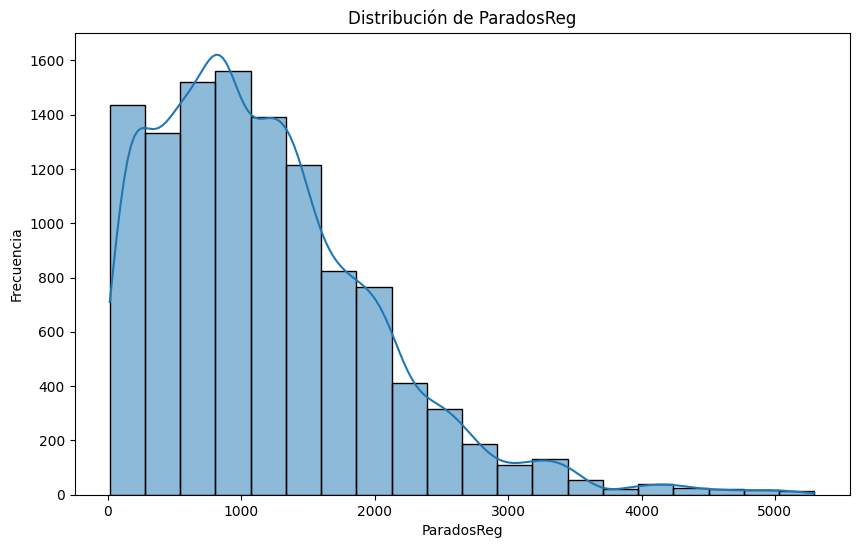

In [24]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_ParoAgrup['ParadosReg'], bins=20, kde=True)
plt.title('Distribución de ParadosReg')
plt.xlabel('ParadosReg')
plt.ylabel('Frecuencia')
plt.show()

In [64]:
# Agrupamos la variable continua ParadosReg en función de los años
df_paroRegAny = df_ParoAgrup.groupby(['Any','Mes','Codi_Districte','Nom_Districte'])['ParadosReg'].sum().reset_index()

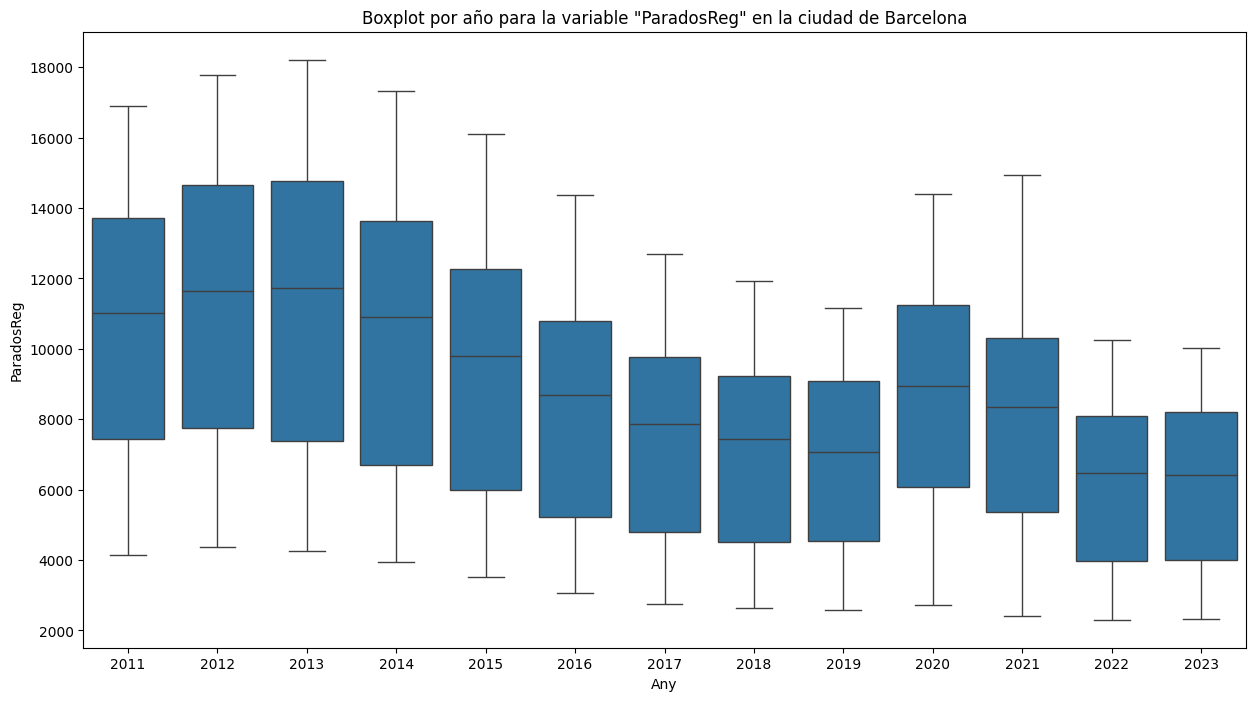

In [61]:
# Crear diagrama de caja para la variable continua "ParadosReg" en funcion de la variable categorica "Any"
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='ParadosReg', data=df_paroRegAny)
plt.title('Boxplot por año para la variable "ParadosReg" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

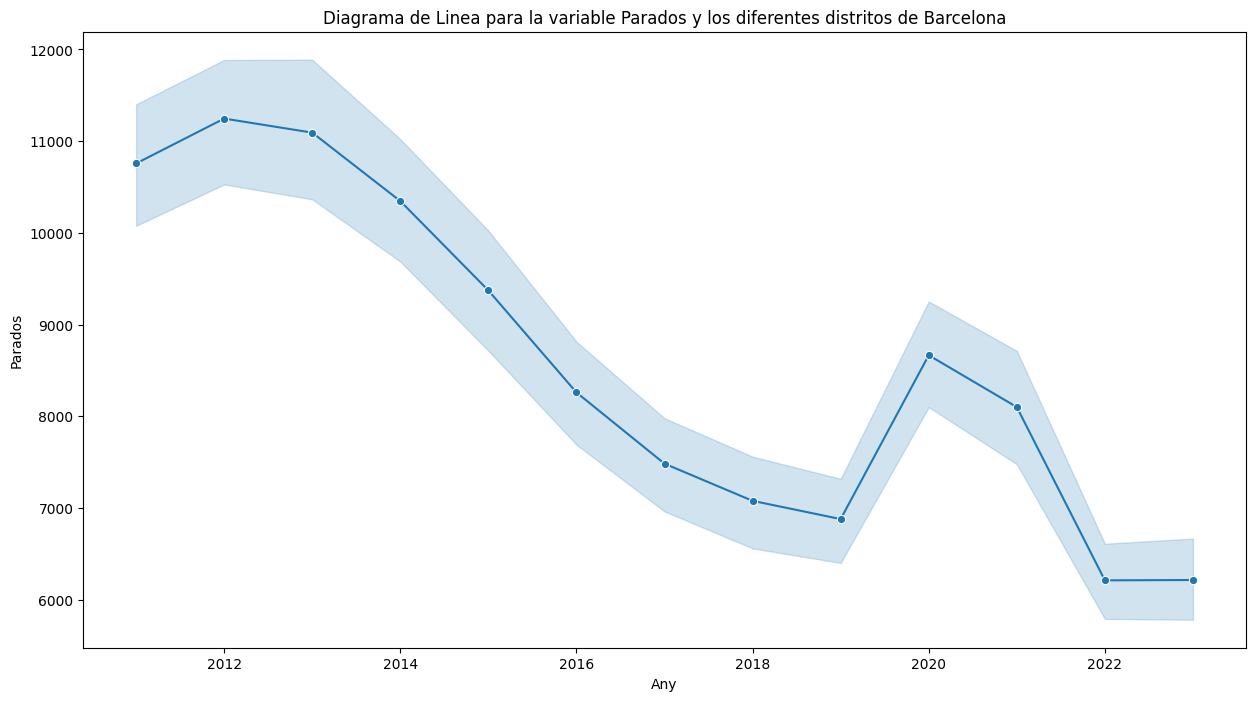

In [62]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_paroRegAny, x='Any', y='ParadosReg', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Parados y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('Parados')

plt.show()

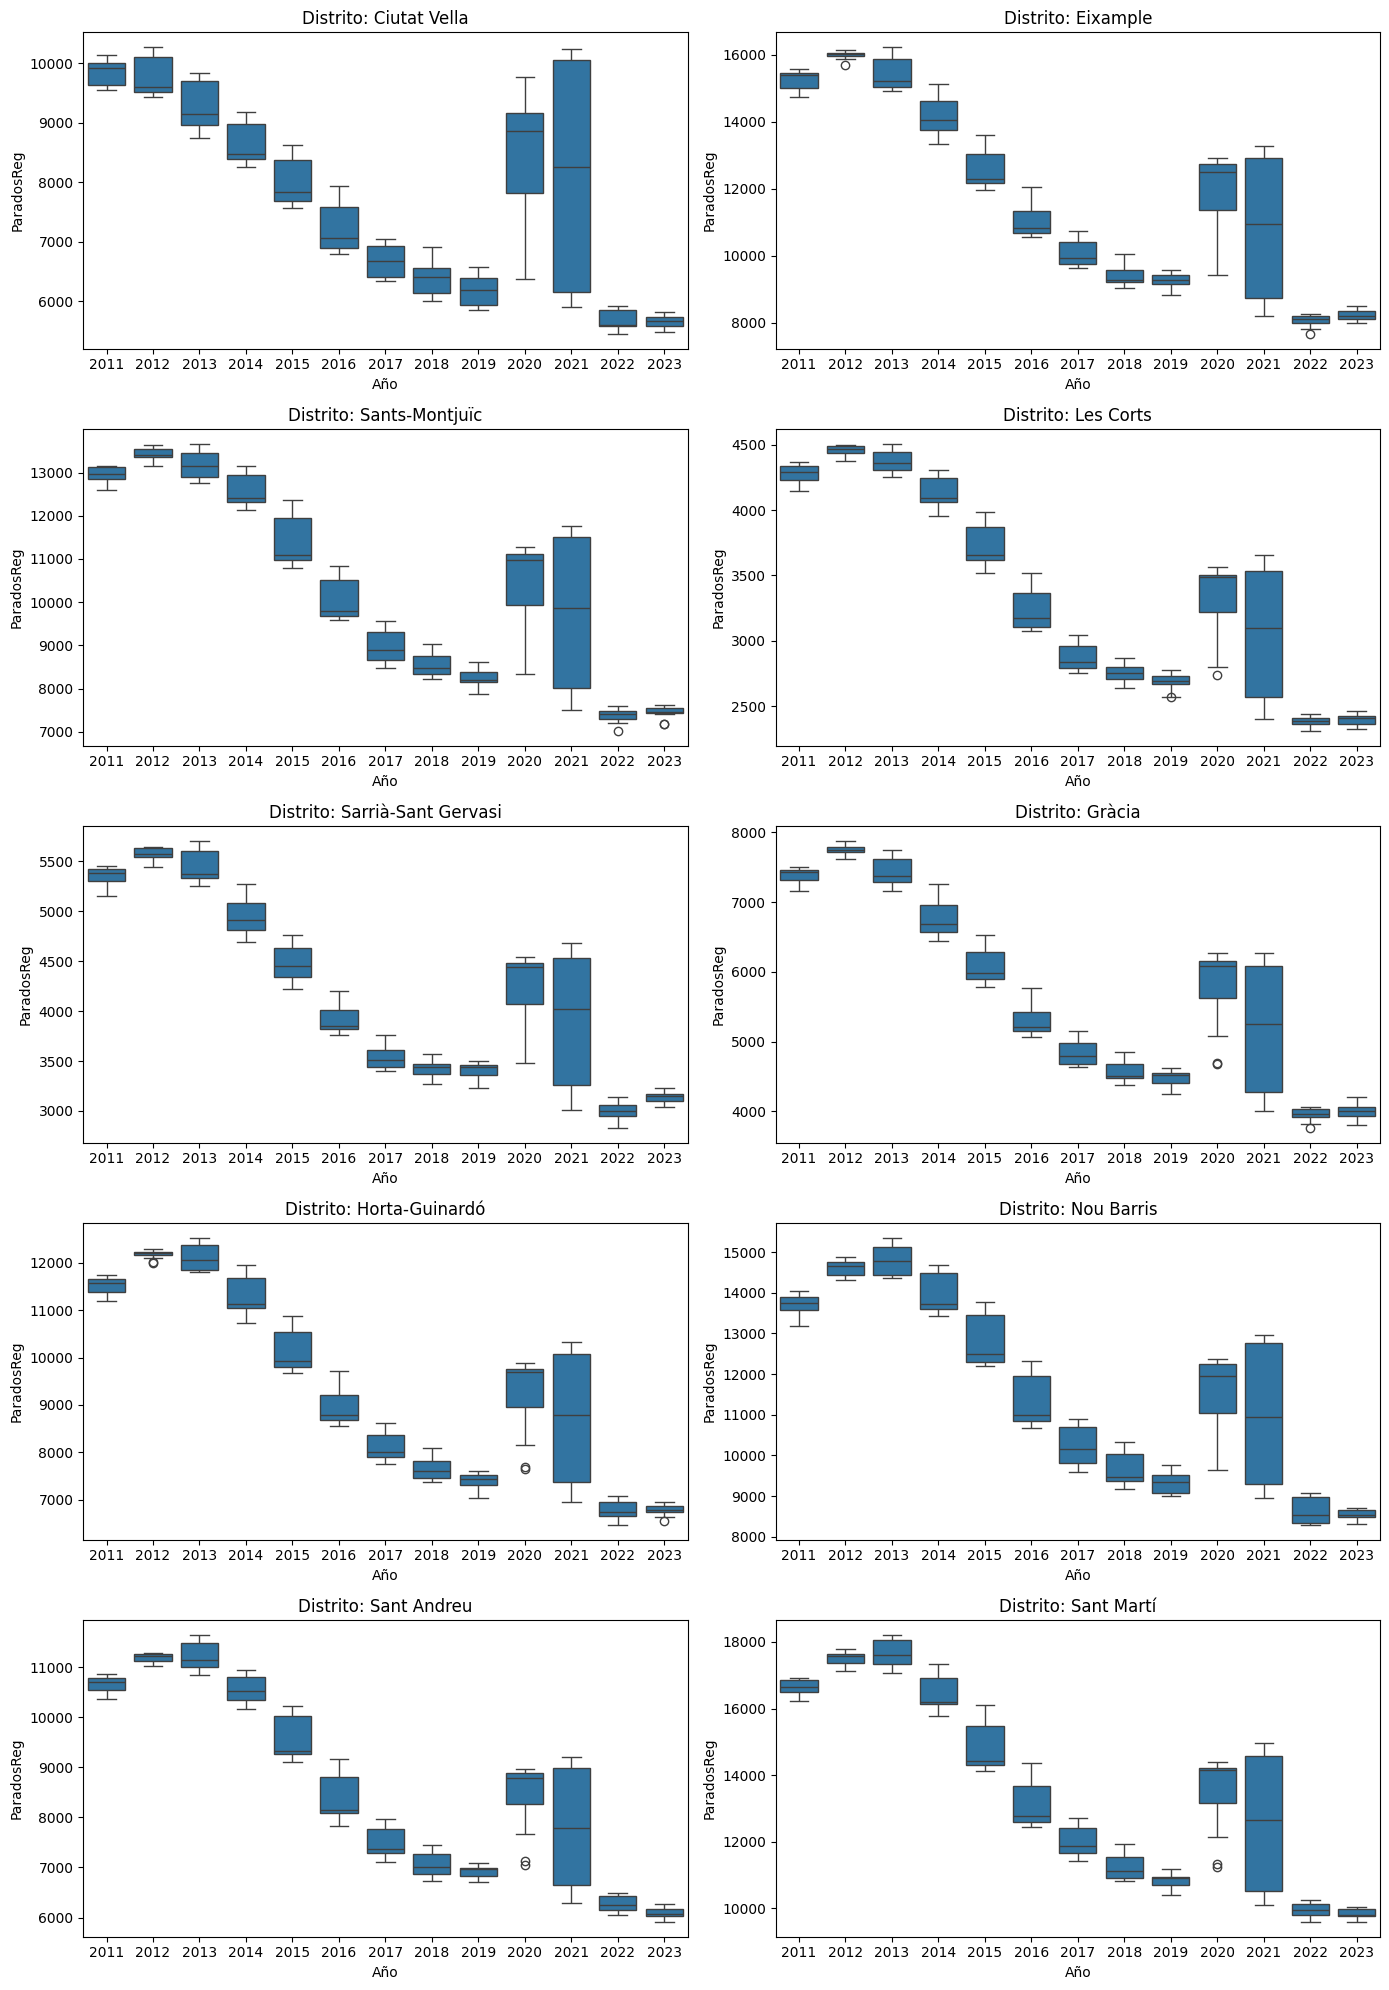

In [63]:
# Crear varios gráficos de boxplot en el mismo eje
plt.figure(figsize=(14,20))

# Primero, dividir los datos por las categorías de la primera variable categórica
for i, category in enumerate(df_paroRegAny['Nom_Districte'].unique(), start=1):
    plt.subplot(5, 2, i)
    subset = df_paroRegAny[df_paroRegAny['Nom_Districte'] == category]

    # Crear un boxplot para cada subconjunto de datos
    sns.boxplot(x='Any', y='ParadosReg', data=subset, ax=plt.gca())
    plt.title(f'Distrito: {category}')
    plt.xlabel('Año')
    plt.ylabel('ParadosReg')

plt.tight_layout()
plt.show()

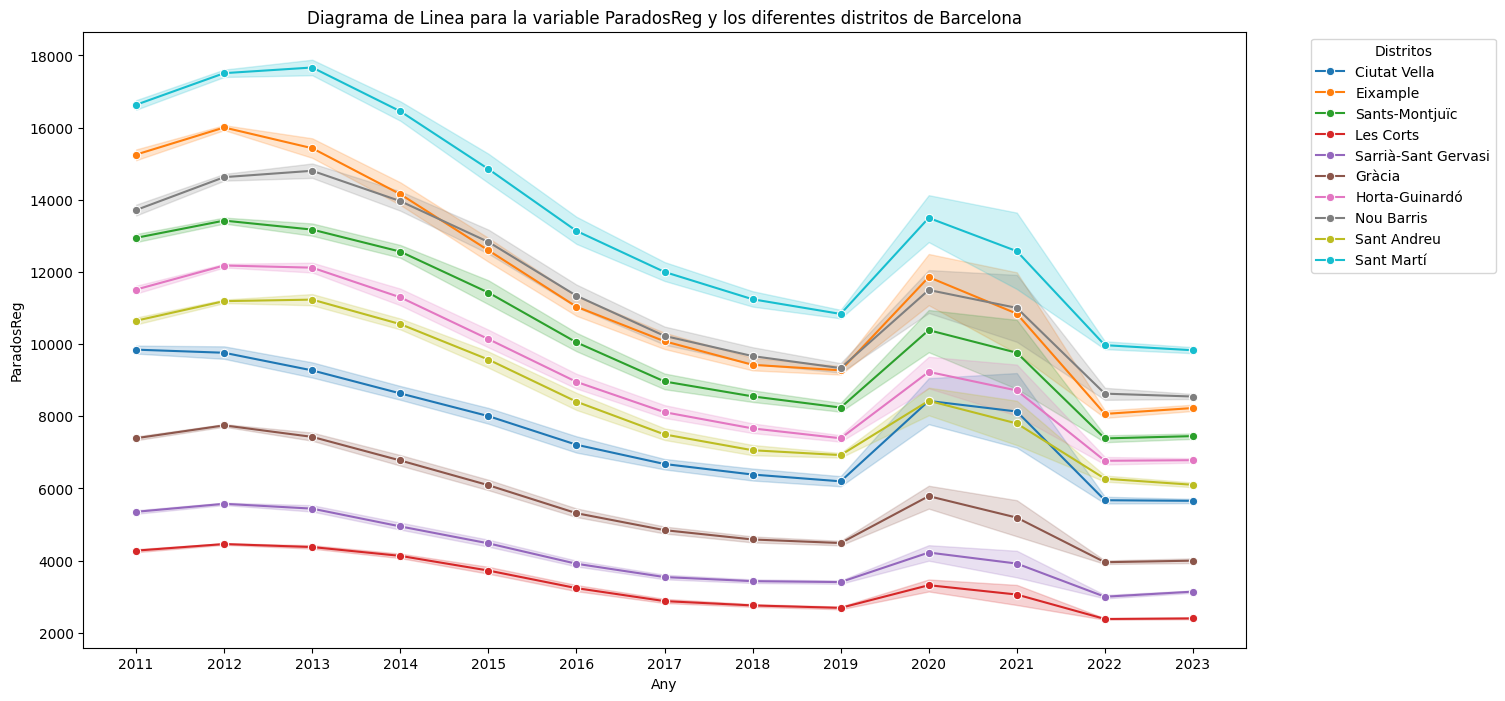

In [77]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))

#Sumamos los parados por distrito
summarized_data = df_paroRegAny.groupby(['Any','Mes','Codi_Districte','Nom_Districte'])['ParadosReg'].sum().reset_index()


sns.lineplot(data=summarized_data, x='Any', y='ParadosReg', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable ParadosReg y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('ParadosReg')
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(any_ar)

# Sacamos la leyenda fuera del grafico

plt.show()

### Variable continua Demanda No Parados (NoParados)

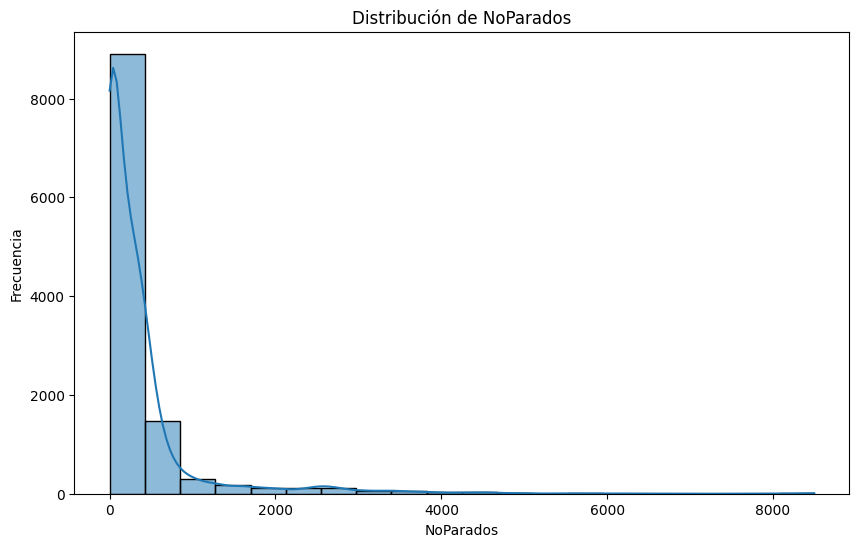

In [28]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_ParoAgrup['NoParados'], bins=20, kde=True)
plt.title('Distribución de NoParados')
plt.xlabel('NoParados')
plt.ylabel('Frecuencia')
plt.show()

In [66]:
# Agrupamos la variable continua ParadosReg en función de los años
df_noParoAny = df_ParoAgrup.groupby(['Any','Mes','Codi_Districte','Nom_Districte'])['NoParados'].sum().reset_index()

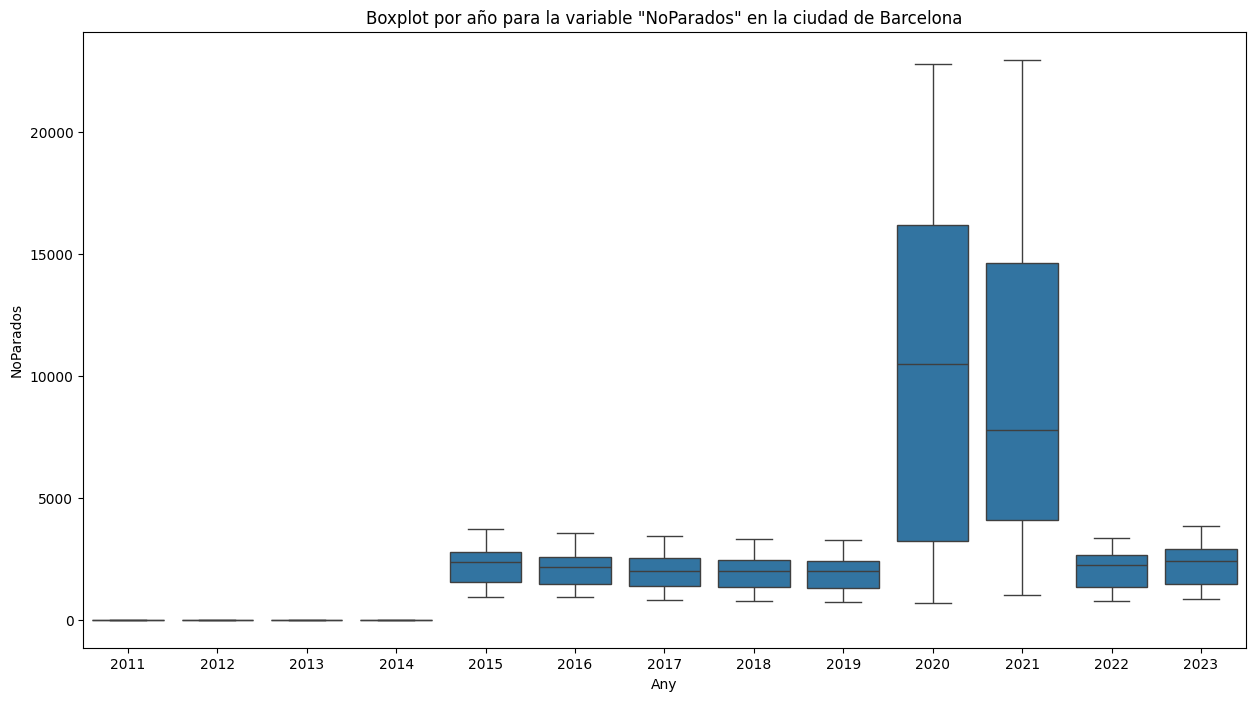

In [67]:
# Crear diagrama de caja para la variable continua NoParados en funcion de la variable categorica "Any"
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='NoParados', data=df_noParoAny)
plt.title('Boxplot por año para la variable "NoParados" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

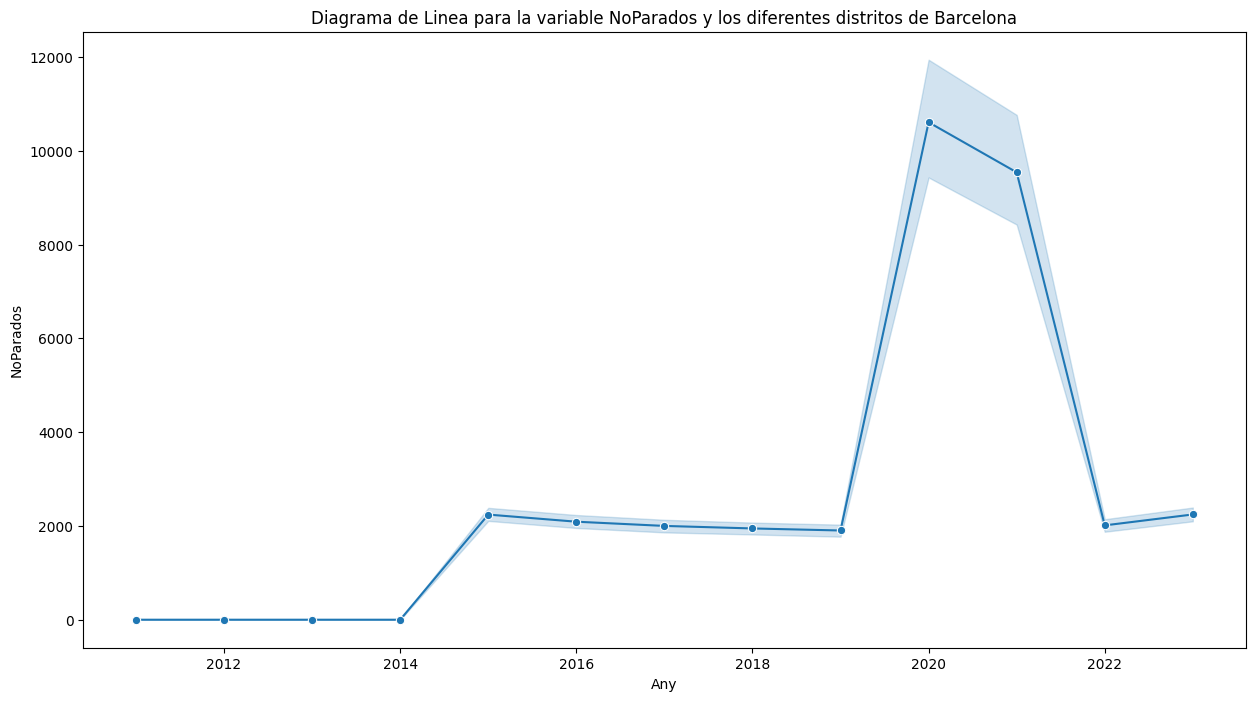

In [68]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_noParoAny, x='Any', y='NoParados', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable NoParados y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('NoParados')

plt.show()

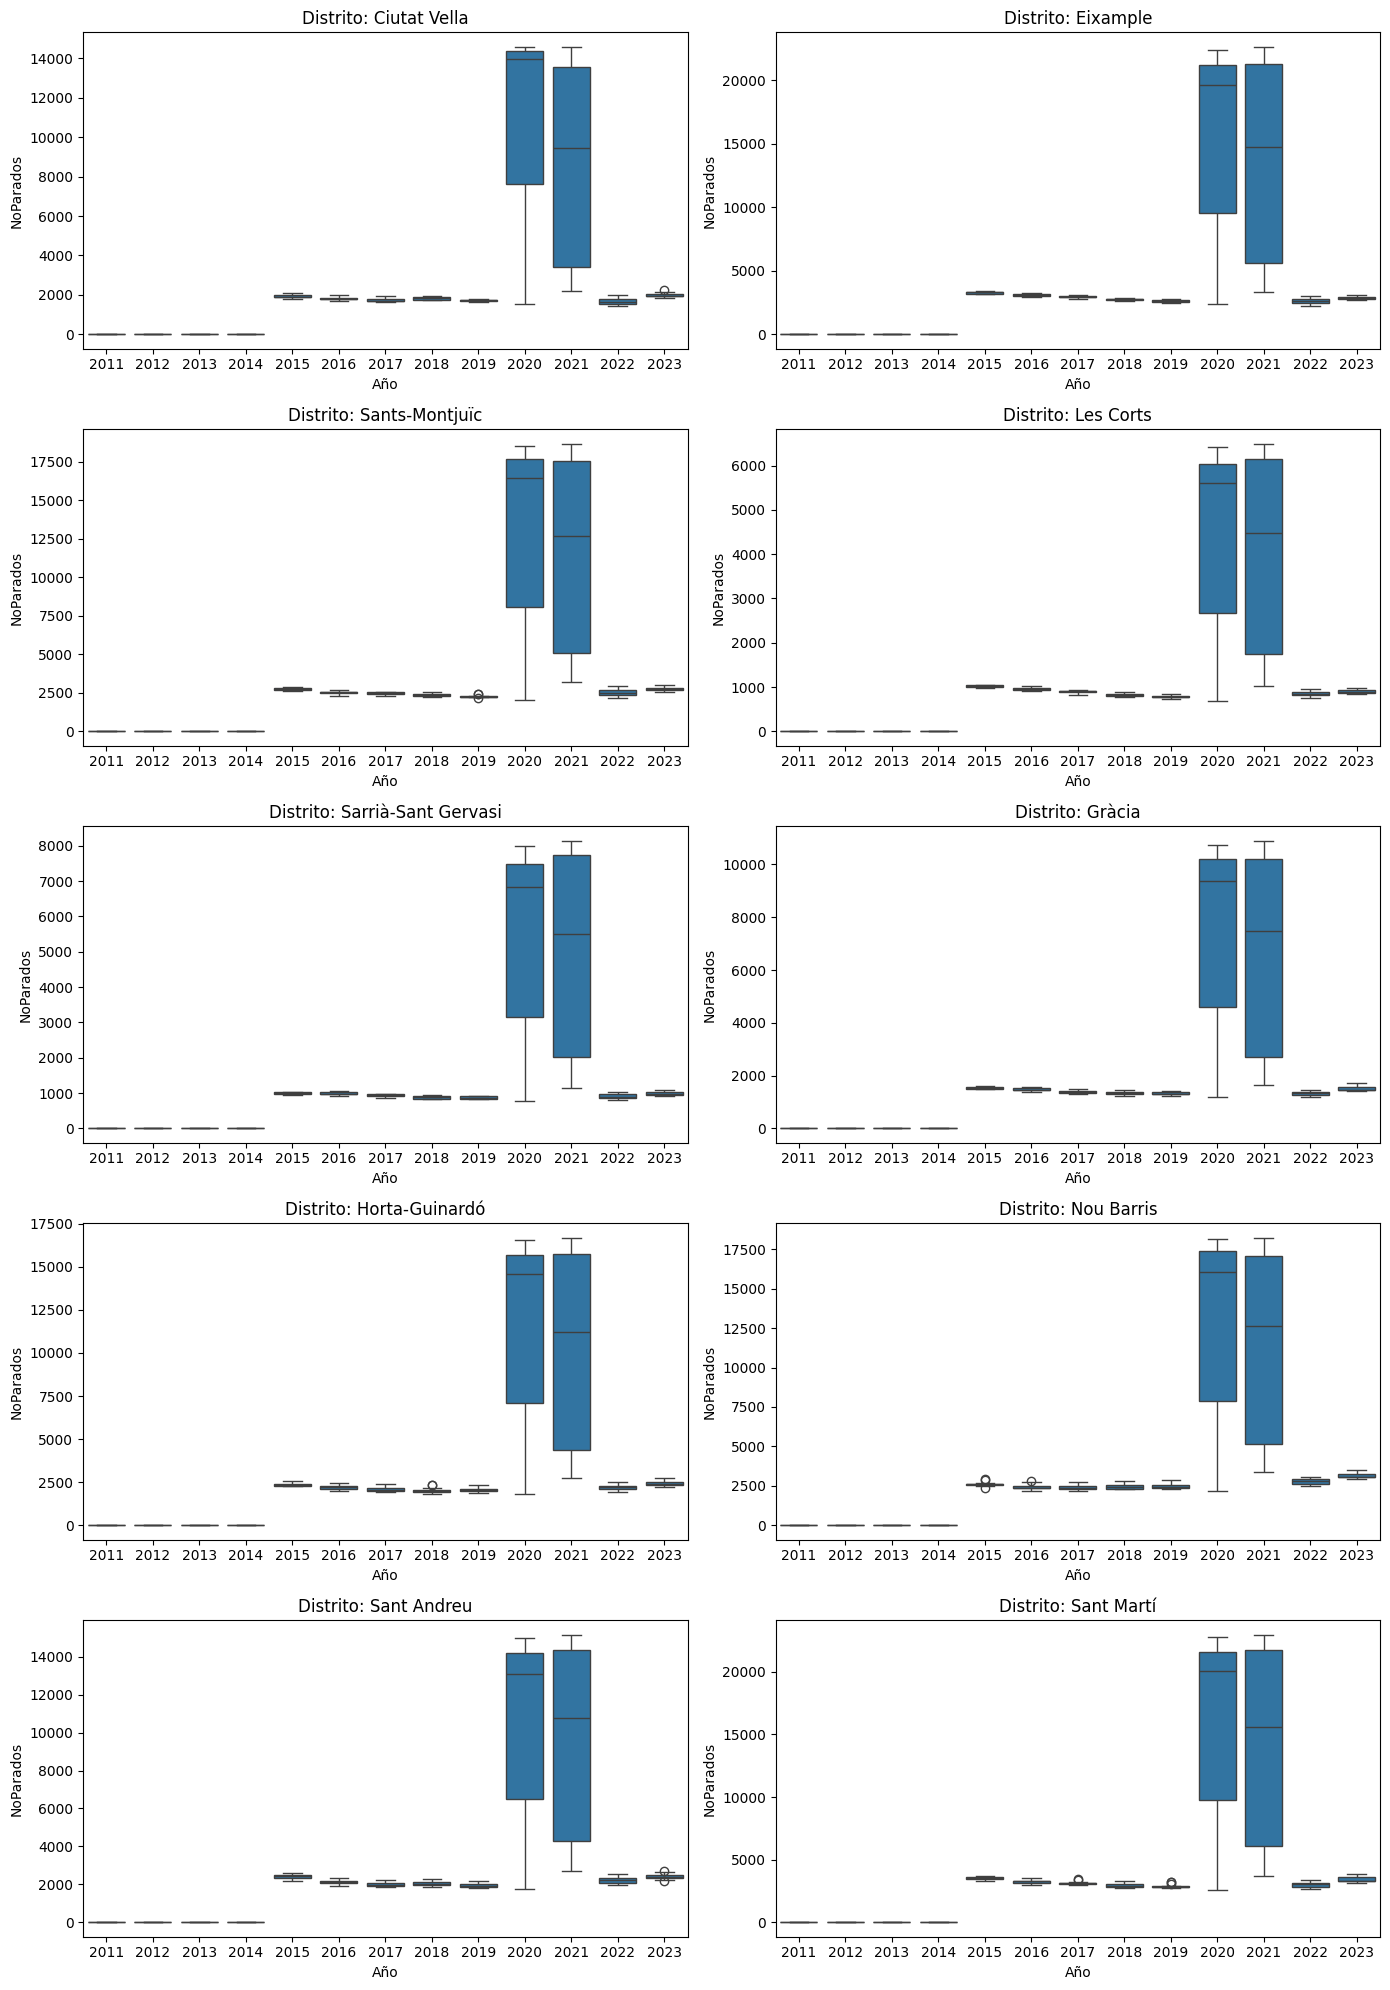

In [69]:
# Crear varios gráficos de boxplot en el mismo eje
plt.figure(figsize=(14,20))

# Primero, dividir los datos por las categorías de la primera variable categórica
for i, category in enumerate(df_noParoAny['Nom_Districte'].unique(), start=1):
    plt.subplot(5, 2, i)
    subset = df_noParoAny[df_noParoAny['Nom_Districte'] == category]

    # Crear un boxplot para cada subconjunto de datos
    sns.boxplot(x='Any', y='NoParados', data=subset, ax=plt.gca())
    plt.title(f'Distrito: {category}')
    plt.xlabel('Año')
    plt.ylabel('NoParados')

plt.tight_layout()
plt.show()

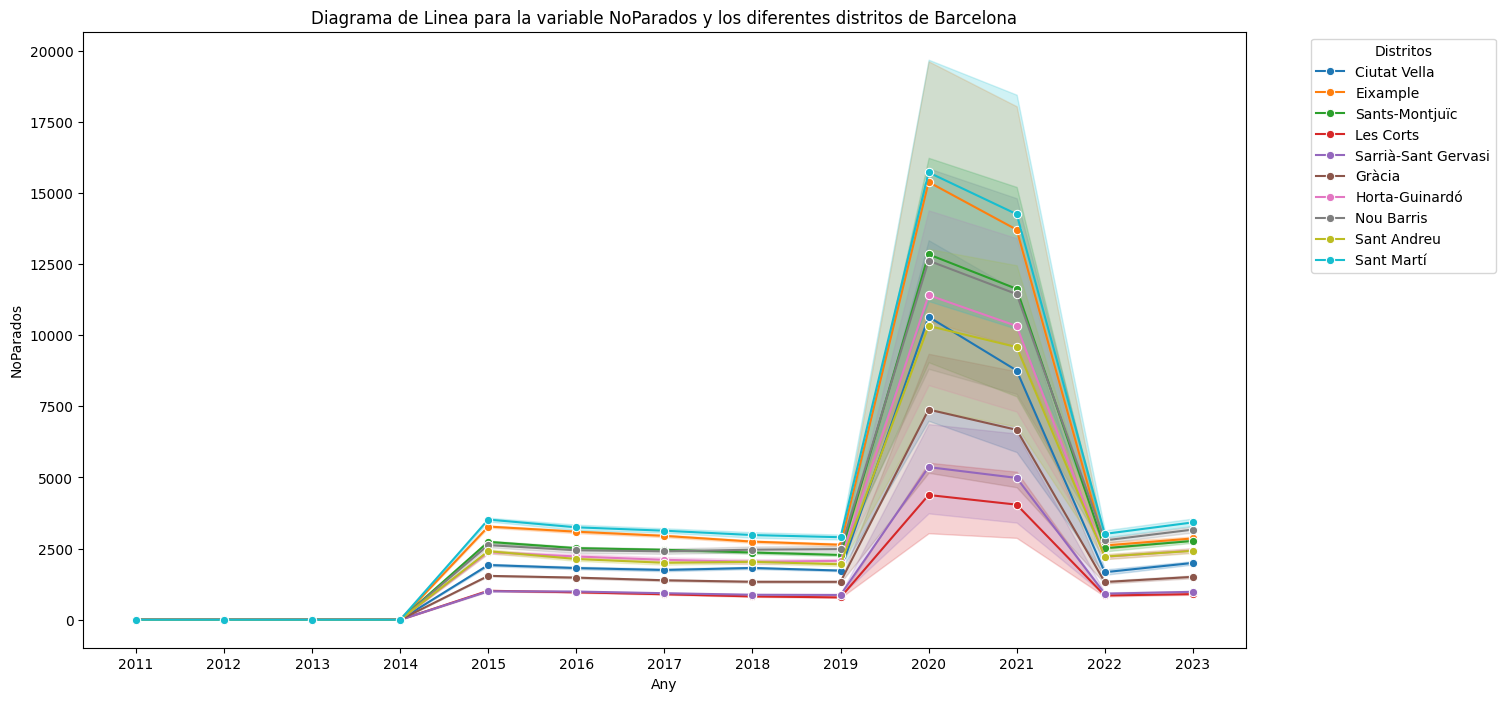

In [78]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))

#Sumamos los parados por distrito
summarized_data = df_noParoAny.groupby(['Any','Mes','Codi_Districte','Nom_Districte'])['NoParados'].sum().reset_index()


sns.lineplot(data=summarized_data, x='Any', y='NoParados', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable NoParados y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('NoParados')
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(any_ar)

# Sacamos la leyenda fuera del grafico

plt.show()

## Carga del Shapefile

Cargamos el archivo tipo shape con los 10 distritos de Barcelona

In [80]:
# Cargar el archivo shapefile de los distritos de Barcelona
barcelona_distritos = gpd.read_file("/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Grafo viario de las calles de la ciudad de Barcelona/BCN_UNITATS_ADM/0301040100_Districtes_UNITATS_ADM.shp")

# Mostrar información básica sobre el shapefile
barcelona_distritos.head()


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID_V,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((431733.736 4582441.816, 431827.673 4..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432033.184 4583665.032, 432032.069 4..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((428773.911 4580873.742, 428833..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((425054.670 4583672.560, 425062.830 4..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((422563.071 4587486.743, 422568..."


In [82]:
# Convertimos el tipo de valor de la variable distrito a entero
barcelona_distritos['DISTRICTE'] = barcelona_distritos['DISTRICTE'].astype(int)

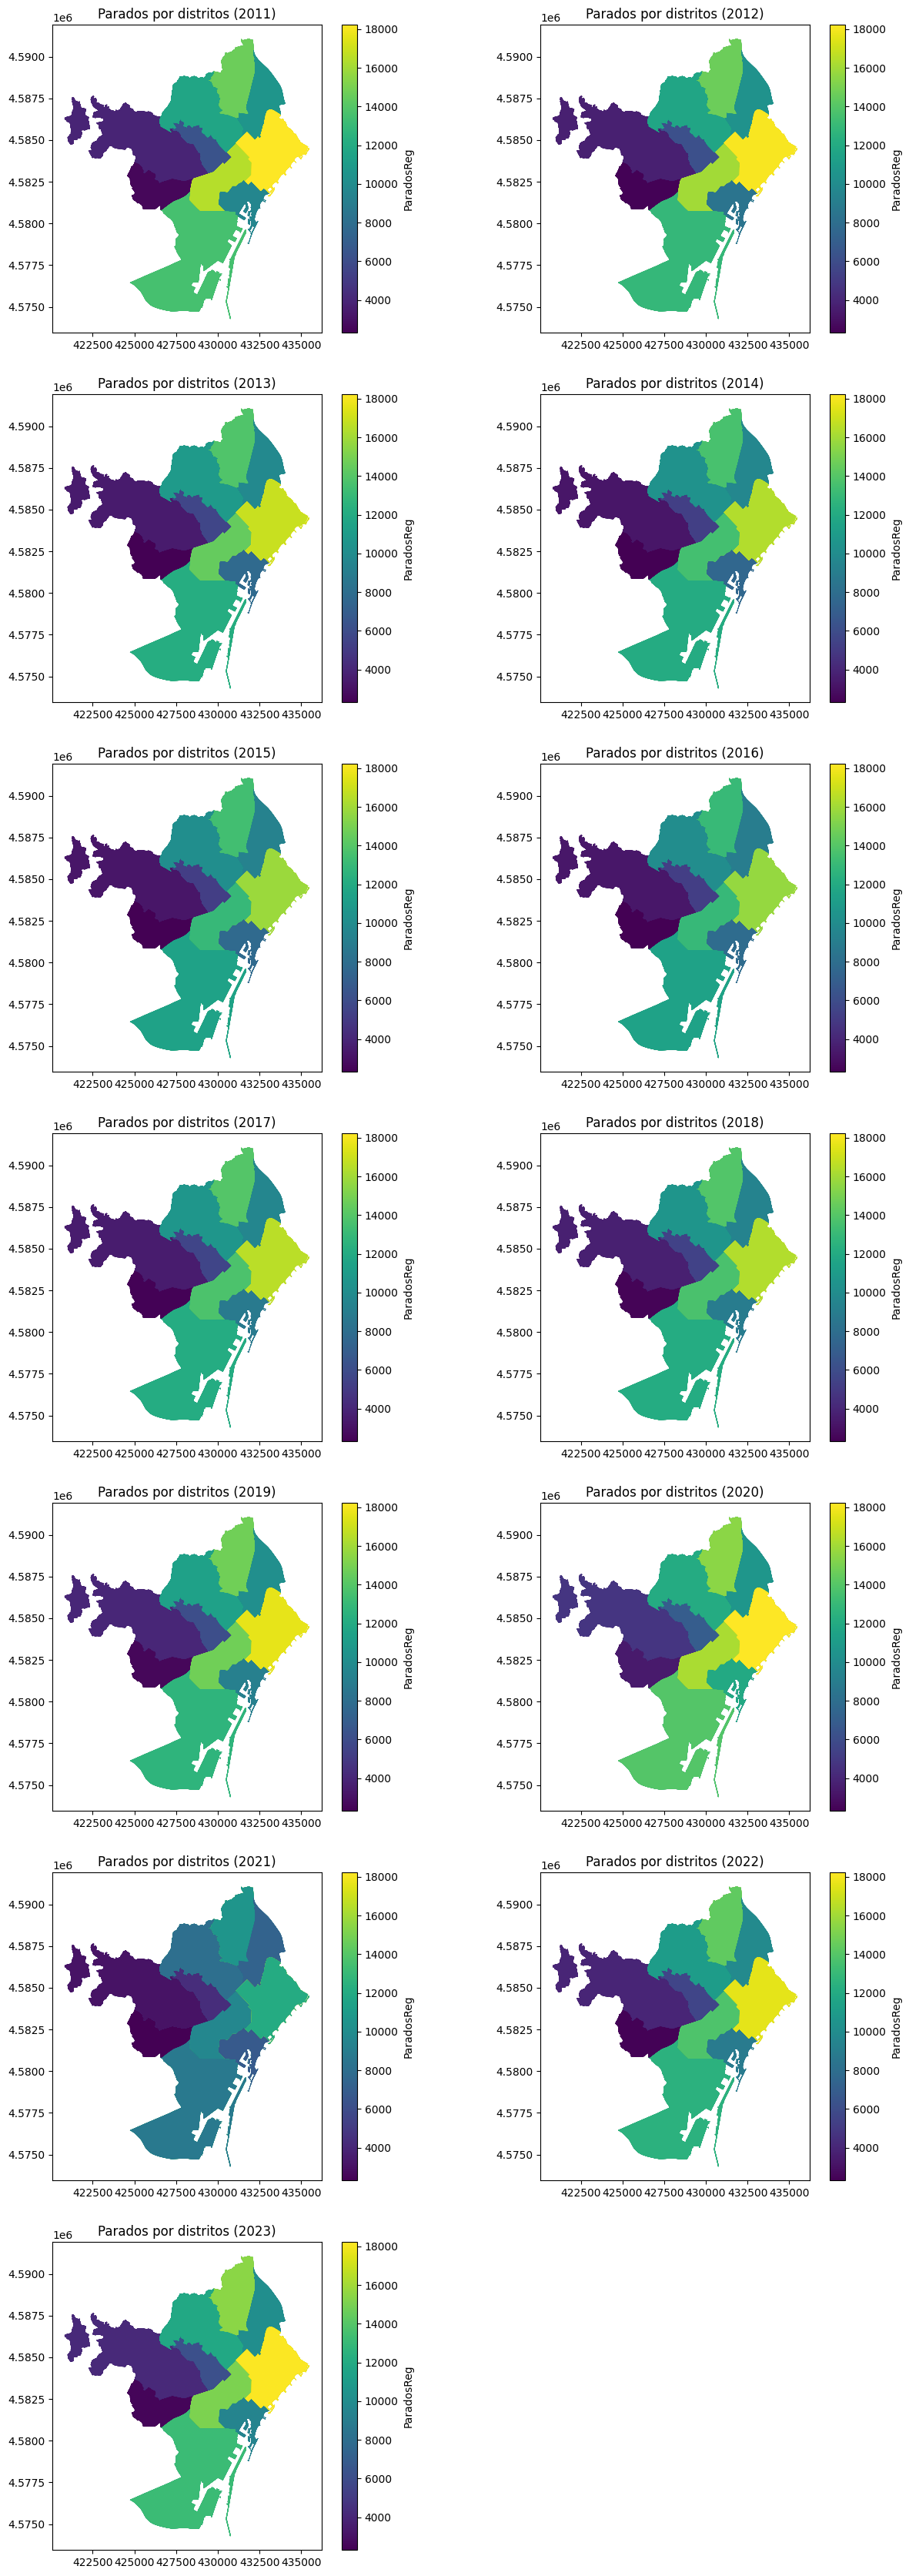

In [97]:
xmin = min(df_paroRegAny['ParadosReg'])
xmax = max(df_paroRegAny['ParadosReg'])

# Crear varios gráficos de boxplot en el mismo eje
plt.figure(figsize=(15, 80))


# Primero, dividir los datos por las categorías de la primera variable categórica
for i, category in enumerate(df_paroRegAny['Any'].unique(), start=1):
    plt.subplot(13, 2, i)
    subset = df_paroRegAny[df_paroRegAny['Any'] == category]  # Filtrar datos para la categoría actual
    barcelona_distritos.plot(color='lightgrey',ax=plt.gca())  # Graficar el Shapefile
    merged_data = barcelona_distritos.merge(subset, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

    # Trazar el GeoDataFrame con un gradiente de color
    cmap = 'viridis'  # Selecciona el mapa de color
    norm = Normalize(vmin=xmin, vmax=xmax)
    sm = ScalarMappable(cmap=cmap, norm=norm)

    merged_data.plot(ax=plt.gca(), column='ParadosReg', cmap='viridis', legend=False)  # Graficar los datos combinados

    # Configuraciones adicionales
    plt.title('Parados por distritos (' + str(category) +')' )

    # Establecer los límites de la leyenda
    sm.set_clim(xmin, xmax)

    # Crear la leyenda con un gradiente de color
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label('ParadosReg')  # Establece el nombre de la variable


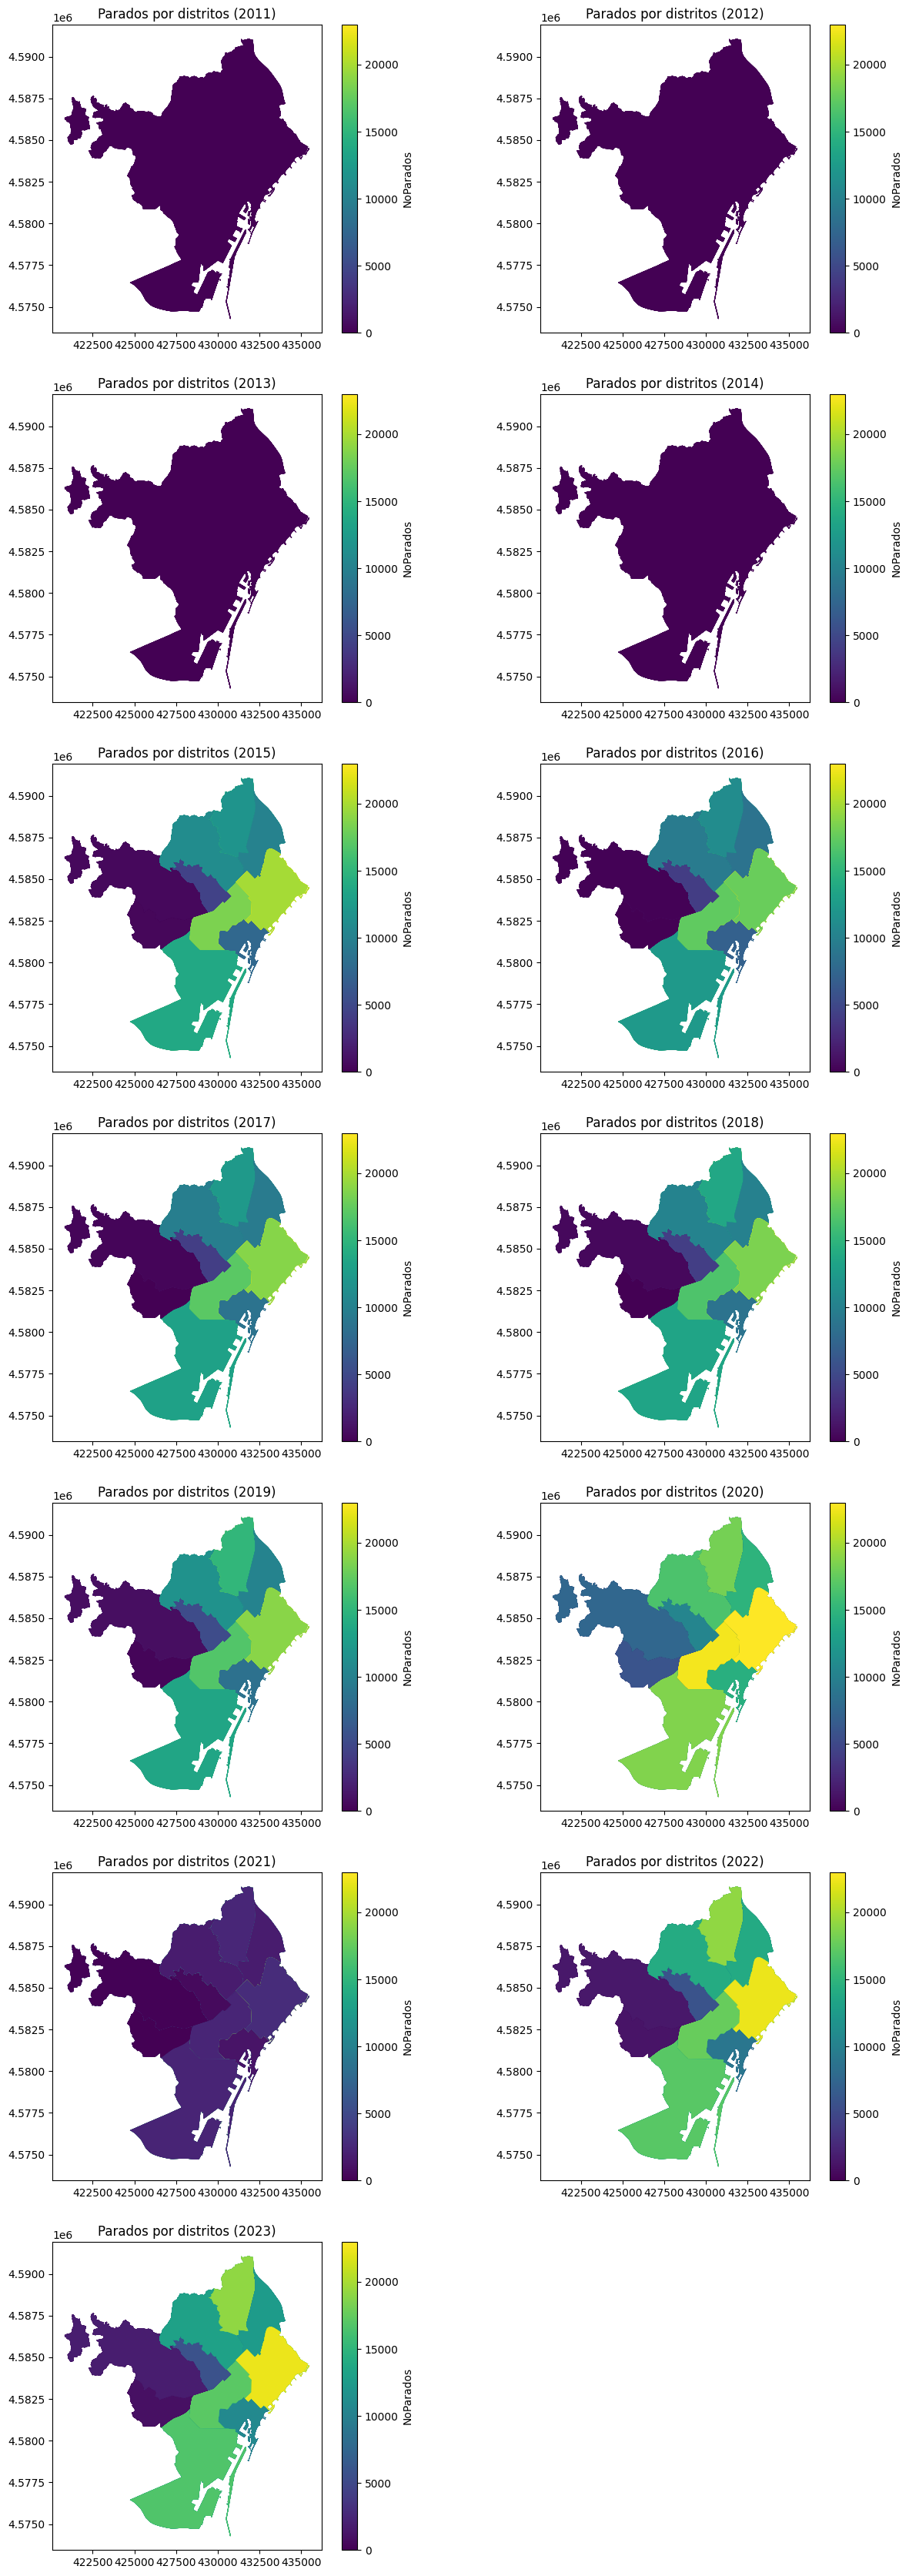

In [98]:
xmin = min(df_noParoAny['NoParados'])
xmax = max(df_noParoAny['NoParados'])

# Crear varios gráficos de boxplot en el mismo eje
plt.figure(figsize=(15, 80))


# Primero, dividir los datos por las categorías de la primera variable categórica
for i, category in enumerate(df_noParoAny['Any'].unique(), start=1):
    plt.subplot(13, 2, i)
    subset = df_noParoAny[df_noParoAny['Any'] == category]  # Filtrar datos para la categoría actual
    barcelona_distritos.plot(color='lightgrey',ax=plt.gca())  # Graficar el Shapefile
    merged_data = barcelona_distritos.merge(subset, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

    # Trazar el GeoDataFrame con un gradiente de color
    cmap = 'viridis'  # Selecciona el mapa de color
    norm = Normalize(vmin=xmin, vmax=xmax)
    sm = ScalarMappable(cmap=cmap, norm=norm)

    merged_data.plot(ax=plt.gca(), column='NoParados', cmap='viridis', legend=False)  # Graficar los datos combinados

    # Configuraciones adicionales
    plt.title('Parados por distritos (' + str(category) +')' )

    # Establecer los límites de la leyenda
    sm.set_clim(xmin, xmax)

    # Crear la leyenda con un gradiente de color
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label('NoParados')  # Establece el nombre de la variable